In [1]:
import scanpy as sc
import squidpy as sq

import numpy as np
from scipy import spatial
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

c:\Users\laure\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
squidpy==1.2.2


In [2]:
# load the pre-processed dataset
adata = sq.datasets.seqfish()

In [3]:
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

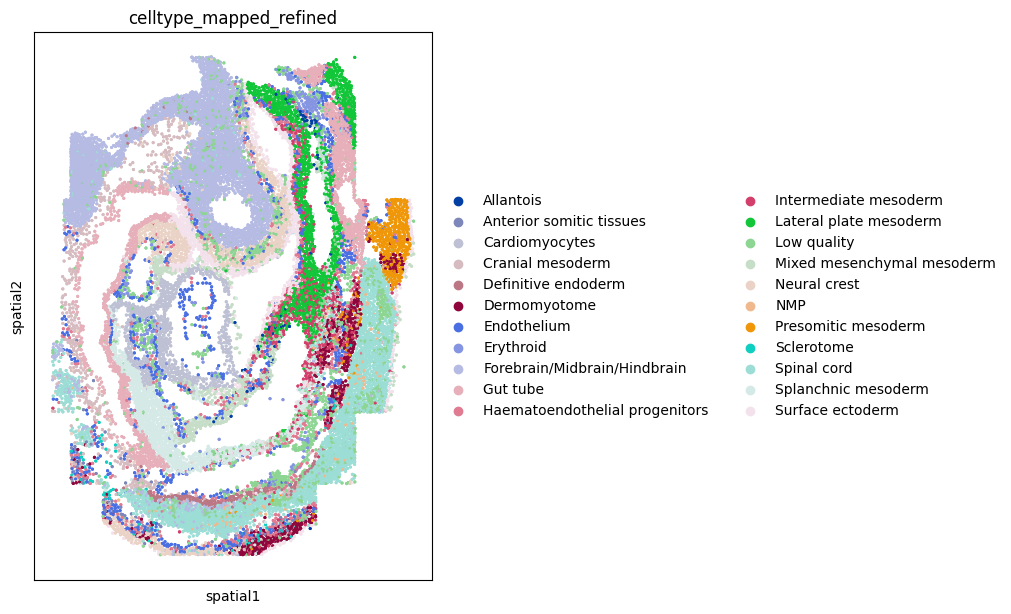

In [16]:
sq.pl.spatial_scatter(adata, color="celltype_mapped_refined", shape=None, figsize=(10, 10))

In [3]:
from platform import python_version

print(python_version())

3.10.7


In [4]:
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

In [3]:
adata_subset = adata[adata.obs["celltype_mapped_refined"] == "Presomitic mesoderm"]

In [4]:
subset_coords = adata_subset.obsm["spatial"].copy()
subset_coords = pd.DataFrame(data=subset_coords, columns=["x","y"])
subset_coords

,x,y
0,1.875540,-0.932808
1,1.902600,-1.117661
2,1.905975,-1.154632
3,1.909103,-0.930118
4,1.862180,-0.939775
...,...,...
453,1.114221,2.920452
454,1.100388,3.012090
455,0.250168,3.410897
456,-0.060437,2.903728


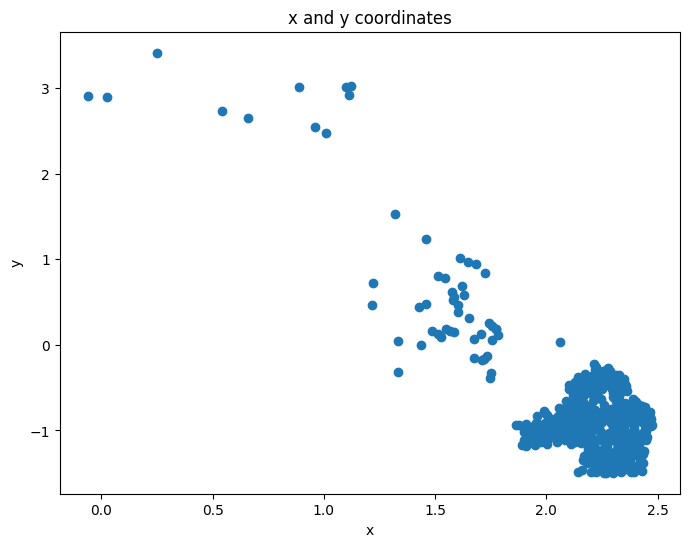

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(subset_coords['x'], subset_coords['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('x and y coordinates')
plt.show()

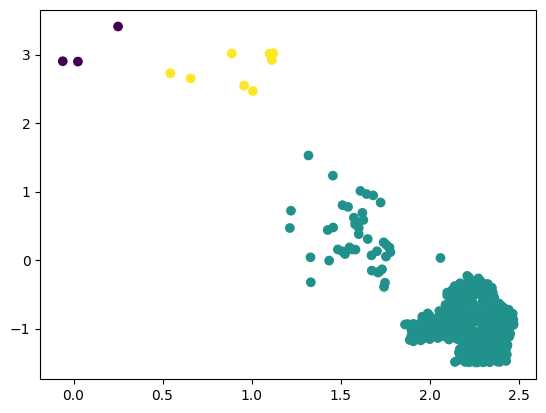

In [7]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5)
model = dbscan.fit(subset_coords)
colors = model.labels_
plt.scatter(subset_coords["x"], subset_coords["y"], c = colors)

In [12]:
outliers = subset_coords[model.labels_ == -1]
print(outliers)

            x         y
455  0.250168  3.410897
456 -0.060437  2.903728
457  0.024693  2.898636


In [ ]:
adata.to_df()

In [ ]:
adata.X

In [ ]:
adata.var

In [ ]:
sc.pl.spatial(adata, color="Area", spot_size=0.03)

In [ ]:
adata.to_df()[["Afp","Alas2"]].mean(axis=1)

In [2]:
adata = sc.read_h5ad("C://backup/Bachelorarbeit/LiverAgeing_pp_lowres.h5ad")

In [3]:
adata = adata[adata.obs["mouse_id"] == "TS5"]

In [4]:
adata.obs["vein_type"] = "lobular_axis"
pv = list(adata[adata.obs["umap_spline"] <= 0.2].obs.index)
cv = list(adata[adata.obs["umap_spline"] >= 0.9].obs.index)
adata.obs.loc[adata.obs.index.isin(pv), "vein_type"]  = "pv"
adata.obs.loc[adata.obs.index.isin(cv), "vein_type"]  = "cv"

C:\Users\laure\AppData\Local\Temp\ipykernel_9020\2683094835.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["vein_type"] = "lobular_axis"


In [5]:
adata = adata[:, adata.var.highly_variable]

In [6]:
adata

View of AnnData object with n_obs × n_vars = 2623 × 2000
    obs: 'array_row', 'array_col', 'um_row', 'um_col', 'id', 'pixel_row', 'pixel_col', 'dapi_mean', 'dapi_mean_norm', 'experiment_id', 'organism', 'age', 'organ', 'age_months', 'mouse_id', 'exp_date', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CT010467.1_pct', 'leiden', 'umap_spline', 'vein_type'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'age_colors', 'experiment_id_colors', 'hvg', 'id_colors', 'leiden', 'leiden_colors', 'log1p', 'matchedVis', 'mouse_id_colors', 'neighbors', 'pca', 'spatial', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [7]:
exp_dist(adata, groups="pv", cluster_key="vein_type", covariates="vein_type")

c:\Users\laure\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<b>Method to build design matrix</b><br>
- returns data frame: obs x (euclidean distance, gene, annotation, coordinates)<br>
- if "gene" is a list of genes, an average expression score (as implemented in scanpy) will be used
- to calculate euclidean distances a kd-tree of anchor point coordinates is constructed, then all coordinates are queried aginst the tree to find the nearest neighbor (minimum euclidean distance)
- normalization in range [0, max] https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range
- merge of list https://stackoverflow.com/questions/38978214/merge-a-list-of-dataframes-to-create-one-dataframe

In [6]:
from anndata import AnnData

from __future__ import annotations

import scanpy as sc
from scanpy import logging as logg
import warnings

from squidpy._docs import d
from squidpy.gr._utils import _save_data
from squidpy._utils import NDArrayA
from squidpy._constants._pkg_constants import Key

__all__ = ["exp_dist"]

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

from sklearn.neighbors import KDTree
from sklearn.metrics import DistanceMetric
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

from typing import Any, Dict, List, Optional, Tuple

from itertools import product
from functools import reduce

@d.dedent
def exp_dist(
    adata: AnnData,
    groups: str | List[str] | NDArrayA,
    cluster_key: str,
    design_matrix_key: str = "design_matrix",
    batch_key: str | None = None,
    covariates: str | List[str] | None = None,
    spatial_key: str = Key.obsm.spatial,
    metric: str = "euclidean",
    copy: bool = False
) -> Optional[AnnData]:
    """
    Build a design matrix consisting of gene expression by distance to selected anchor point(s).
    Parameters
    ----------
    %(adata)s
    %(cluster_key)s
    groups
        anchor points to calculate distances from, can be a single str, a list of str or a numpy array of coordinates
    cluster_key
        annotation in .obs to take anchor point from
    metric
        distance metric, defaults to "euclidean"
    design_matrix
        name of the design matrix saved to .obsm, defaults to "design_matrix"
    batch_key
        optional: specifiy batches which contain identical anchor points
    covariates
        additional covariates from .obs which can be used for modelling
    Returns
    -------
    If ``copy = True``, returns the design_matrix and the distance thresholds intervals
    Otherwise, stores design_matrix in .obsm
    """
    start = logg.info(f"Creating {design_matrix_key}")
    # list of columns which will be categorical later on
    categorical_columns = [cluster_key]
    
    # save initial metadata to adata.uns
    adata.uns[design_matrix_key] = _add_metadata(
        adata, 
        cluster_key, 
        groups, 
        metric=metric, 
        batch_key=batch_key, 
        covariates=covariates)

    anchor = [groups] if isinstance(groups, str) or isinstance(groups, np.ndarray) else groups # type: ignore [assignment]
    
    # prepare batch key for iteration (Nonetype alone in product will result in neutral element)
    if batch_key is None:
        batch = [None]
    else:
        batch = adata.obs[batch_key].unique()
        categorical_columns.append(batch_key)

    batch_design_matrices = {}
    
    # iterate over slide + anchor combinations (anchor only possible as well)
    for batch_var, anchor_var in product(batch, anchor):
        # initialize dataframe and anndata depending on whether batches are used or not
        if batch_var is not None:
            df = _init_design_matrix(adata, 
                                     cluster_key, 
                                     spatial_key, 
                                     batch_key=batch_key, 
                                     batch_var=batch_var
                                    )
            anchor_coord, batch_coord = _get_coordinates(adata[adata.obs[batch_key] == batch_var], anchor_var, cluster_key)

        else:
            df = _init_design_matrix(adata, cluster_key, spatial_key)
            anchor_coord, batch_coord = _get_coordinates(adata, anchor_var, cluster_key)

        #if dbscan detects outliers or at least one additional cluster, a warning will be issued
        if _check_outliers(anchor_coord = anchor_coord):
            logg.warning(f"Anchor point {anchor_var} contains spatial outliers. It is recommended to remove them for more accurate gene expression analysis.")

        tree = KDTree(anchor_coord, metric=DistanceMetric.get_metric(metric))
        mindist, _ = tree.query(batch_coord)
        
        
        if isinstance(anchor_var, np.ndarray):
            anchor_var = "custom_anchor"
            anchor = ["custom_anchor"]
        df.insert(loc=1, column=str(anchor_var), value=mindist)
        if batch_var is not None:
            df["obs"] = adata[adata.obs[batch_key] == batch_var].obs_names
        else:
            df["obs"] = adata.obs_names
        batch_design_matrices[str((batch_var, anchor_var))] = df

    # merge individual data frames
    # use merge when several anchor points were used and concat when one anchor but several slides were used
    # if a single anchor point with a single batch is used take design matrix directly

    if batch_key is None and len(anchor) > 1:
        df = reduce(
            lambda df1, df2: pd.merge(df1, df2, on=[cluster_key, "obs"]),
            list(batch_design_matrices.values()),
        )
        df.set_index("obs", inplace=True)
        df.index.name = None
    elif batch_key is not None:
        df = pd.concat(list(batch_design_matrices.values()))
        df = df.reindex(adata.obs_names)
        df = df.drop("obs", axis=1)
    else:
        df = batch_design_matrices[str((batch_var, anchor_var))].drop("obs", axis=1)

    # normalize euclidean distances column(s)
    df = _normalize_distances(df, anchor)
    
    # add additional covariates to design matrix
    if covariates is not None:
        if isinstance(covariates, str):
            covariates = [covariates]
        df[covariates] = adata.obs[covariates].copy()
            
    if copy:
        logg.info("Finish", time=start)
        return df
    else:
        #adapted from https://github.com/scverse/squidpy/blob/2cf664ffd9a1654b6d921307a76f5732305a371c/squidpy/gr/_ppatterns.py#L398-L404
        return _save_data(adata, attr="obsm", key=design_matrix_key, data=df, time=start)

def _add_metadata(
    adata: AnnData,
    cluster_key: str,
    groups: str | List[str] | NDArrayA,
    batch_key: str | None = None,
    covariates: str | List[str] | None = None,
    metric: str = "euclidean"
    ) -> Dict[str, Any]:
    """Add metadata to adata.uns."""
    metadata = {}
    if isinstance(groups, np.ndarray):
        metadata["anchor_scaled"] = "custom_anchor"
        metadata["anchor_raw"] = "custom_anchor_raw"
    elif isinstance(groups, list):
        for i, anchor in enumerate(groups):
            metadata["anchor_scaled" + str(i)] = anchor
            metadata["anchor_raw" + str(i)] = anchor + "_raw"
    else:
        metadata["anchor_scaled"] = groups
        metadata["anchor_raw"] = groups + "_raw"
        
    metadata["annotation"] = cluster_key
    
    if batch_key is not None:
        metadata["batch_key"] = batch_key
    
    metadata["metric"] = metric
    
    if covariates is not None:
        if isinstance(covariates, str):
            covariates = [covariates]
        for i, covariate in enumerate(covariates):
            metadata["covariate_" + str(i)] = covariate

    return metadata
    
def _init_design_matrix(
    adata: AnnData,
    cluster_key: str,
    spatial_key: str,
    batch_key: Optional[str] = None,
    batch_var: Optional[str] = None
    ) -> pd.DataFrame:
    """Initialize design matrix."""
    if batch_key is not None and batch_var is not None:
        df = adata[adata.obs[batch_key] == batch_var].obs[[cluster_key]].copy()
        df[batch_key] = adata[adata.obs[batch_key] == batch_var].obs[batch_key].copy()
    else:
        df = adata.obs[[cluster_key]].copy()
    
    return df
    
def _get_coordinates(
    adata: AnnData,
    anchor: str = None,
    annotation: str = None) -> Tuple[NDArrayA, NDArrayA]:
    """Get anchor coordinates and coordinates of all observations."""
    if isinstance(anchor, np.ndarray):
        return (anchor, adata.obsm["spatial"])
    else:
        return (np.array(adata[adata.obs[annotation] == anchor].obsm["spatial"]), adata.obsm["spatial"])

def _check_outliers(anchor_coord: np.ndarray) -> bool:
    """Check if the anchor point contains spatial outliers."""
    anchor_coord_df = pd.DataFrame(data=anchor_coord, columns=["x","y"])
    dbscan = DBSCAN()
    model = dbscan.fit(anchor_coord_df)
    
    if not anchor_coord_df[model.labels_ == -1].empty or not anchor_coord_df[model.labels_ == 1].empty:
        return True
    else:
        return False

def _normalize_distances(df: pd.DataFrame,
                         anchor: list = None, 
                         ) -> pd.DataFrame:
    """Normalize distances to anchor."""
    scaler = MinMaxScaler()
    if len(anchor) > 1:
        max_dist_anchor = df[anchor].columns[np.where(df[anchor].values == np.max(df[anchor].values))[1]][0]
        scaler.fit(df[[max_dist_anchor]].values)
        df[f"{max_dist_anchor}_raw"] = df[max_dist_anchor]
        df[max_dist_anchor] = scaler.transform(df[[max_dist_anchor]].values)
        anchor.remove(max_dist_anchor)
        for a in anchor:
            df[f"{a}_raw"] = df[a]
            df[a] = scaler.transform(df[[a]].values)

    else:
        df[f"{anchor[0]}_raw"] = df[anchor]
        df[anchor] = scaler.fit_transform(df[anchor].values)
    return df

In [8]:
from anndata import AnnData
import scanpy as sc
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
from typing import List
import pandas as pd


def _spatial_de(adata: AnnData,
                design_matrix_key: str,
                smooth: str,
                covariates: str | List[str] | None = None,
                correction: str = "fdr_bh",
                copy: bool = False) -> pd.DataFrame:
    from joblib import delayed, Parallel
    """Fit GAMs with smoothed distances to anchor point."""

    #write formula
    formula = "gene ~"
    if isinstance(covariates, list):
        for covariate in covariates:
            formula += covariate + " + "
        formula.removesuffix("+")
    else:
        formula += " " + covariates

    #fit models in parallel
    f_test_results = Parallel(n_jobs=-1)(delayed(_build_model)
    (adata, design_matrix_key, smooth, response_var = gene, formula = formula, correction = correction) 
    for gene in adata.var_names)
    
    #get table of DEGs with adjusted p-values
    results = pd.DataFrame(f_test_results, columns=['gene','p-val','lfc'])
    results = results.sort_values('p-val', ascending=False)
    #pval_and_lfc = [(b,c) for a, b, c in f_test_results]
    #pval_and_pvaladj = [(a,b) for a, b, c in f_test_results]
    #logfc_sorted = list(dict(sorted(dict(pval_and_lfc).items(), key=lambda item: item[0], reverse=True)).items())
    #f_test_res_sorted = list(dict(sorted(dict(pval_and_pvaladj).items(), key=lambda item: item[1], reverse=True)).items())
    #pvals = [x[1] for x in f_test_res_sorted]
    #genes = [x[0] for x in f_test_res_sorted]
    #coef = [x[1] for x in logfc_sorted]
    print(results)
    vals = results[['p-val']].values.flatten()
    print(len(vals))
    adjusted = sm.stats.multipletests(vals, method=correction)
    print(adjusted)
    #results = {'gene': genes, 'p-values': pvals, 'p-values_adjusted': adjusted[1], 'lfc': coef}
    #results = pd.DataFrame(data=results)
    results['p-val_adj'] = adjusted[1]
    adata.uns[design_matrix_key + "_DEGs"] = results

def _build_model(adata: AnnData,
                design_matrix_key: str,
                smooth: str,
                response_var: str,
                formula: str,
                correction: str = "fdr_bh"):
    design_matrix = adata.obsm[design_matrix_key].copy()
    design_matrix[response_var] = sc.get.obs_df(adata, response_var).to_numpy()
    design_matrix = design_matrix.rename(columns={response_var: 'gene'})
    x_spline = design_matrix[[smooth]]
    bs = BSplines(x_spline, df=6, degree=3)
    gam_bs = GLMGam.from_formula(formula=formula, data=design_matrix, smoother=bs)
    res_bs = gam_bs.fit()
    res_bs.summary()
    A = np.identity(len(res_bs.params))
    print(res_bs.params)
    A = A[1:,:]
    return (response_var, res_bs.f_test(A).pvalue, res_bs.params[1])

In [9]:
_spatial_de(adata=adata, design_matrix_key="design_matrix", smooth="pv", covariates="vein_type")

         gene          p-val       lfc
873    Gpr141   9.903737e-01  0.000078
1283   Nfkbid   9.873556e-01 -0.000139
576     Ephb1   9.840409e-01  0.008185
1303    Npas1   9.830597e-01 -0.001933
1796    Sycp1   9.808611e-01  0.001065
...       ...            ...       ...
1339      Oat  2.470328e-323 -1.961653
1726  Slco1b2   0.000000e+00 -1.012771
709      Glul   0.000000e+00 -2.682958
1692   Slc1a2   0.000000e+00 -2.537412
1725  Slco1a1   0.000000e+00 -0.365051

[2000 rows x 3 columns]
2000
(array([False, False, False, ...,  True,  True,  True]), array([0.99037368, 0.98784948, 0.98502595, ..., 0.        , 0.        ,
       0.        ]), 2.564631832135955e-05, 2.5e-05)


In [12]:
adata.uns["design_matrix_DEGs"]

,gene,p-values,p-values_adjusted
0,Gpr141,9.903737e-01,9.903737e-01
1,Nfkbid,9.873556e-01,9.878495e-01
2,Ephb1,9.840409e-01,9.850259e-01
3,Npas1,9.830597e-01,9.845365e-01
4,Sycp1,9.808611e-01,9.828268e-01
...,...,...,...
1995,Oat,2.470328e-323,9.881313e-321
1996,Glul,0.000000e+00,0.000000e+00
1997,Slc1a2,0.000000e+00,0.000000e+00
1998,Slco1a1,0.000000e+00,0.000000e+00


In [10]:
adata.uns["design_matrix_DEGs"]

,gene,p-val,lfc,p-val_adj
873,Gpr141,9.903737e-01,0.000078,9.903737e-01
1283,Nfkbid,9.873556e-01,-0.000139,9.878495e-01
576,Ephb1,9.840409e-01,0.008185,9.850259e-01
1303,Npas1,9.830597e-01,-0.001933,9.845365e-01
1796,Sycp1,9.808611e-01,0.001065,9.828268e-01
...,...,...,...,...
1339,Oat,2.470328e-323,-1.961653,9.881313e-321
1726,Slco1b2,0.000000e+00,-1.012771,0.000000e+00
709,Glul,0.000000e+00,-2.682958,0.000000e+00
1692,Slc1a2,0.000000e+00,-2.537412,0.000000e+00


In [12]:
import dash_bio

dash_bio.VolcanoPlot(adata.uns["design_matrix_DEGs"])

ModuleNotFoundError: No module named 'dash_bio'

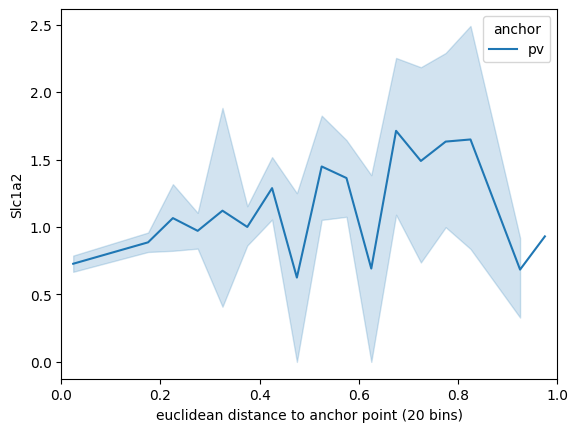

In [17]:
exp_dist(adata, "design_matrix", "Slc1a2")

In [ ]:
#anchor_coord = _prune_anchor_tree(anchor_coord, 0.05, 4, metric)
#test later
        #ARRAY = ARRAY[ARRAY >= some_condition]
def _prune_anchor_tree(anchor_coord: np.ndarray,
                       pct_node_to_filter: float,
                       nth_nbor: int,
                       metric: str) -> np.ndarray:
    """
    Prune the anchor coordinate tree to keep the anchor point dense.
    ----------
    pct_node_to_filter
        Percentage of anchor point spots to be removed.
    nth_nbor
        Filter based on the distance to nth neighbor. If a single spot belonging to an anchor point
        is distant to the main region of the anchor point, then a value of 1 will filter the spot
        if there is a cluster of spots distant to the main region of the anchor point, the value needs to be greater
        than the amount of spots in the cluster, to filter the entire cluster.
    Returns
    -------
    A np.ndarray of anchor coordinates.
    """    
        
    #query the anchor point spots against each other to get the distances between all spots within the anchor point
    anchor_tree = KDTree(anchor_coord, metric=DistanceMetric.get_metric(metric))
    anchor_dist, anchor_id = anchor_tree.query(anchor_coord, k=nth_nbor)
        
    #m amount of nodes to filter in the tree
    top_n_dist = round(len(anchor_dist)*pct_node_to_filter)
        
    #for all nodes in the tree, get the distances to the nth neighbor
    nth_nbor_dist = anchor_dist[...,(nth_nbor-1)].ravel()
        
    #get the nodes which have the top m highest distances to the nth neighbor
    top_indices = np.argpartition(nth_nbor_dist, -top_n_dist)[-top_n_dist:]
        
    #from the tree remove the nodes with the m highest distances to the nth neighbor
    to_keep = np.ones(len(anchor_dist), dtype=bool)
    to_keep[top_indices] = False
    anchor_coord = anchor_coord[to_keep]
        
    return anchor_coord

In [5]:
sc.tl.score_genes(adata, ["Alas2","Acvr1"], score_name="test_score")

c:\Users\laure\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [21]:
exp_dist(adata,["NMP"],"celltype_mapped_refined")

In [47]:
exp_dist(adata,"8","leiden", batch_key="age", covariates="mouse_id")

In [10]:
Key.obsm.spatial

'spatial'

In [11]:
adata.obsm["design_matrix"]

,celltype_mapped_refined,NMP,Spinal cord,NMP_raw,Spinal cord_raw
embryo1_Pos0_cell10_z2,Low quality,0.620655,0.589390,2.555081,2.426368
embryo1_Pos0_cell10_z5,Lateral plate mesoderm,0.598041,0.567241,2.461981,2.335185
embryo1_Pos0_cell100_z2,Erythroid,0.625994,0.593277,2.577058,2.442372
embryo1_Pos0_cell100_z5,Lateral plate mesoderm,0.528531,0.496666,2.175826,2.044649
embryo1_Pos0_cell101_z2,Erythroid,0.639117,0.606315,2.631082,2.496044
...,...,...,...,...,...
embryo1_Pos28_cell97_z2,Spinal cord,0.047179,0.000000,0.194225,0.000000
embryo1_Pos28_cell97_z5,Endothelium,0.088062,0.061623,0.362528,0.253686
embryo1_Pos28_cell98_z2,Spinal cord,0.040907,0.000000,0.168406,0.000000
embryo1_Pos28_cell98_z5,Haematoendothelial progenitors,0.078670,0.051380,0.323865,0.211519


In [11]:
adata.uns["design_matrix"]

{'anchor_scaled': 'Cortex_1',
 'anchor_raw': 'Cortex_1_raw',
 'annotation': 'cluster',
 'metric': 'euclidean'}

<b>Method to plot gene expression by distance from anchor point</b>
- plots binned data
- returns plot and dataframe

In [13]:
from anndata import AnnData

import seaborn as sns

import pandas as pd
import numpy as np

from matplotlib.axes import Axes
from matplotlib.figure import Figure

from pandas.api.types import is_categorical_dtype
from typing import Optional, Union

def exp_dist(
    adata: AnnData, 
    design_matrix_key: str = None,
    var: str = None,
    n_bins: int = 20,
    use_raw: Optional[bool] = False) -> Union[Figure, Axes, None]:
    """Plot gene expression by distance to anchor point."""
    if isinstance(var, str):
        var = [var] # type: ignore[assignment]

    dfs = {}
    
    df = _get_data(adata = adata, key=design_matrix_key, func_name="_exp_dist", attr = "obsm")

    if use_raw:
        anchor_type = "anchor_raw"
        df = df[[value for key, value in adata.uns[design_matrix_key].items() if "anchor_raw" in key or "annotation" in key or "batch" in key]]
    else:
        anchor_type = "anchor_scaled"
        df = df[[value for key, value in adata.uns[design_matrix_key].items() if "anchor_scaled" in key or "annotation" in key or "batch" in key]]
        
    for v in var:
        # add var column to design matrix
        df[v] = sc.get.obs_df(adata, v).to_numpy()

        # set some plot settings depending on input
        if "batch_key" in adata.uns[design_matrix_key]:
            anchor = adata.uns[design_matrix_key]["batch_key"]
            x_axis_desc = f'{adata.uns[design_matrix_key]["metric"]} distance to {adata.uns[design_matrix_key]["annotation"]} cluster {adata.uns[design_matrix_key][anchor_type]} ({n_bins} bins)'
            #df = df.drop(adata.uns[design_matrix_key]["covariates"], axis=1)
            df_melt = df.rename(
                {str(adata.uns[design_matrix_key][anchor_type]): adata.uns[design_matrix_key]["metric"]}, axis=1
            )
        else:
            anchor = "anchor"
            x_axis_desc = f'{adata.uns[design_matrix_key]["metric"]} distance to anchor point ({n_bins} bins)'
            df_melt = df.melt(
                id_vars=[v, adata.uns[design_matrix_key]["annotation"]],
                var_name=anchor,
                value_name=adata.uns[design_matrix_key]["metric"],
            )

        # sort by euclidean distance
        df_melt.sort_values(adata.uns[design_matrix_key]["metric"], inplace=True)
        
        # create bins and get median from each binning interval
        df_melt["bin"] = pd.cut(df_melt[adata.uns[design_matrix_key]["metric"]], n_bins, include_lowest=True)

        df_melt[x_axis_desc] = df_melt.apply(lambda row: row["bin"].mid, axis=1)

        dfs[v] = df_melt

    # generate the plots
    for idx, v in enumerate(var):
        plt.subplot(1, len(var), idx + 1)
        plot = sns.lineplot(data=dfs[v], x=x_axis_desc, y=v, hue=anchor)
        plot.set(xlim=(0, dfs[v][adata.uns[design_matrix_key]["metric"]].max()))
    plt.show()

#adapted from https://github.com/scverse/squidpy/blob/2cf664ffd9a1654b6d921307a76f5732305a371c/squidpy/pl/_graph.py#L32-L40
def _get_data(adata: AnnData, key: str, func_name: str, attr: str = "obsm") -> Any:
    try:
        if attr == "obsm":
            return adata.obsm[key]
        elif attr == "uns":
            return adata.uns[key]
        else:
            raise ValueError(f"attr must be either 'uns' or 'obsm', got {attr}")
    except KeyError:
        raise KeyError(
            f"Unable to get the dat from 'adata.{attr}[{key}]'. "
            f"Please run `squidpy.tl.{func_name}' first.")

In [ ]:
_def_check_lognormal()

In [52]:
from anndata import AnnData

import pandas as pd
import numpy as np

def _subset_df(adata: AnnData, df: pd.DataFrame, var: str) -> pd.DataFrame:
    #get indices of rows which contain non-zero values of given var
    row_ids = adata.uns["sparse_nonzero"][0][np.where(adata.uns["sparse_nonzero"][1] == adata.to_df().columns.get_loc(var))]
    
    #df = df.iloc[d,:] #deprecated apparently
    #subset df to keep only rows containing non-zero values of given var
    return df.loc[df.index[list(row_ids)]]

/tmp/ipykernel_12237/3924934338.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[v] = sc.get.obs_df(adata, v).to_numpy()


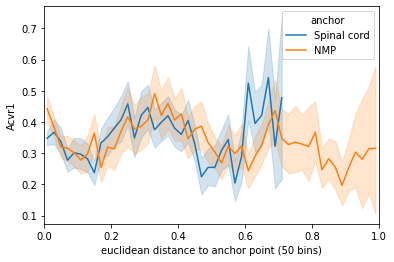

In [78]:
exp_dist(adata, "design_matrix", var="Acvr1", n_bins=50, use_raw=False)

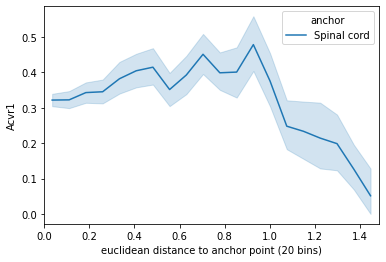

In [19]:
plot_gexp_by_dist(adata, "design_matrix", var="Acvr1", use_raw=True)

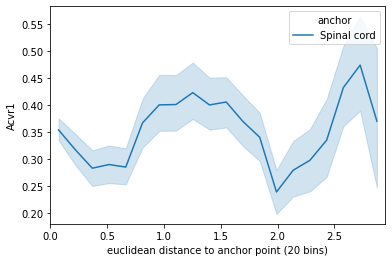

In [25]:
plot_gexp_by_dist(adata, "design_matrix", var="Acvr1", use_raw=True)

In [129]:
a = adata[adata.obs["celltype_mapped_refined"] == "Spinal cord"]
a.obs["anchor"] = "Spinal cord"
b = adata[adata.obs["celltype_mapped_refined"] != "Spinal cord"]
b.obs["anchor"] = "other"
adata = a.concatenate(b)

/tmp/ipykernel_2451/1667072699.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  a.obs["anchor"] = "Spinal cord"
/tmp/ipykernel_2451/1667072699.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  b.obs["anchor"] = "other"
/home/laurens/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [16]:
adata.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,leiden,cluster
AAACGAGACGGTTGAT-1,1,35,79,3808,8.245122,9285.0,9.136263,23.155627,28.723748,36.241249,49.929995,0.0,0.0,0.0,9285.0,3,Thalamus_1
AAAGGGATGTAGCAAG-1,1,24,62,5288,8.573384,16644.0,9.719865,19.718818,25.666907,33.699832,47.524634,0.0,0.0,0.0,16644.0,2,Hippocampus
AAATGGCATGTCTTGT-1,1,13,69,5191,8.554874,15977.0,9.678968,20.629655,26.757213,34.743694,48.889028,0.0,0.0,0.0,15977.0,0,Cortex_1
AAATGGTCAATGTGCC-1,1,33,51,4923,8.501876,12454.0,9.429877,21.711900,26.818693,33.948932,46.314437,0.0,0.0,0.0,12454.0,13,Lateral_ventricle
AAATTAACGGGTAGCT-1,1,34,58,4045,8.305484,11166.0,9.320718,27.261329,33.100484,40.847215,54.200251,0.0,0.0,0.0,11166.0,2,Hippocampus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTCGTTCAGTTACC-1,1,22,58,3443,8.144389,8103.0,9.000113,22.695298,29.877823,38.837468,53.288905,0.0,0.0,0.0,8103.0,4,Fiber_tracts
TTGTGGCCCTGACAGT-1,1,18,60,4971,8.511577,14779.0,9.601030,21.381690,27.924758,36.213546,49.780093,0.0,0.0,0.0,14779.0,0,Cortex_1
TTGTTAGCAAATTCGA-1,1,22,42,4820,8.480737,14396.0,9.574775,20.595999,26.674076,34.655460,48.624618,0.0,0.0,0.0,14396.0,5,Cortex_3
TTGTTCAGTGTGCTAC-1,1,24,64,3372,8.123558,8671.0,9.067855,28.578019,34.794141,42.647907,56.314151,0.0,0.0,0.0,8671.0,2,Hippocampus


In [30]:
from typing import List
import pytest

from anndata import AnnData


@pytest.mark.parametrize("groups", ["NMP", ["NMP", "Spinal cord"], None])
@pytest.mark.parametrize("batch_key", [])
@pytest.mark.parametrize("covariates")
@pytest.mark.parametrize("metric", ["euclidean", "manhattan"])
def test_exp_dist(
    groups: str | List[str] | None,
    batch_key: str | None,
    covariates: str | List[str] | None,
    metric: str
    ):
    """Check whether the design matrix is being built correctly."""
    adata = sq.datasets.seqfish()
    
    df = build_design_matrix(adata=adata, 
                             cluster_key="celltype_mapped_refined", 
                             groups=groups, 
                             batch_key=batch_key, 
                             covariates=covariates, 
                             metric=metric,
                             copy=True)
    
    if isinstance(group, str):
        groups = [groups]
    if isinstance(covariates, str):
        covariates = [covariates]
    batch = int(batch_key is not None)
    min_length = len(groups)
    max_length = 1+batch+len(groups)*2+len(covariates)
    
    #shape
    assert df.index == adata.obs.index
    assert min_length <= len(df.columns) <= max_length
    #type
    assert isinstance(df.iloc[:, 0], CategoricalDtype)
    assert isinstance(df["batch"], CategoricalDtype)
    #normalization
    assert np.max(df[groups].values)) <= 1
    assert df[groups].value_counts()[1] <= 1

In [40]:
assert adata.obs["Area"].value_counts()[4544] <= 59

In [3]:
adata.obs

,array_row,array_col,um_row,um_col,id,pixel_row,pixel_col,dapi_mean,dapi_mean_norm,experiment_id,...,age_months,mouse_id,exp_date,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CT010467.1_pct,leiden,umap_spline
12x15-37_30_A1,15,12,1500,1200,37_30_A1,3755.135135,3024.108108,56.809600,0.371006,37_30,...,22.5,TS16,03.12.2021,3543,15950.0,954.0,5.981191,25.241379,4,0.842128
12x19-37_30_A1,19,12,1900,1200,37_30_A1,4729.837838,3024.108108,50.264000,0.328258,37_30,...,22.5,TS16,03.12.2021,2701,11618.0,728.0,6.266139,32.914440,1,0.552153
12x18-37_30_A1,18,12,1800,1200,37_30_A1,4486.162162,3024.108108,38.413333,0.250865,37_30,...,22.5,TS16,03.12.2021,3109,14250.0,875.0,6.140351,24.968422,4,0.849798
12x17-37_30_A1,17,12,1700,1200,37_30_A1,4242.486486,3024.108108,30.451667,0.198870,37_30,...,22.5,TS16,03.12.2021,2433,8139.0,451.0,5.541222,28.381866,4,0.912175
12x16-37_30_A1,16,12,1600,1200,37_30_A1,3998.810811,3024.108108,51.780000,0.338159,37_30,...,22.5,TS16,03.12.2021,3139,12309.0,696.0,5.654399,27.353970,4,0.883227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18x27-37_43_C3,27,18,2700,1800,37_43_C3,14339.115586,10342.583023,44.592500,0.346733,37_43,...,3.0,TS28,10/21/2021,4926,23206.0,1392.0,5.998449,16.224251,3,0.776340
18x22-37_43_C3,22,18,2200,1800,37_43_C3,12343.152515,10364.154932,51.645000,0.401571,37_43,...,3.0,TS28,10/21/2021,5121,24198.0,1376.0,5.686420,14.356558,3,0.766402
18x21-37_43_C3,21,18,2100,1800,37_43_C3,11943.959901,10368.469314,60.430000,0.469879,37_43,...,3.0,TS28,10/21/2021,6388,38739.0,2136.0,5.513824,14.793878,5,0.558646
18x24-37_43_C3,24,18,2400,1800,37_43_C3,13141.537744,10355.526169,52.875000,0.411135,37_43,...,3.0,TS28,10/21/2021,5356,28064.0,1807.0,6.438854,14.278078,5,0.467296


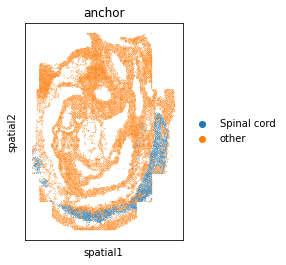

In [131]:
sc.pl.spatial(adata, color="anchor", spot_size=0.03)

In [137]:
a = adata[adata.obsm["design_matrix"]["Spinal cord"] == 0]
a.obs["anchor_new"] = "Spinal cord"
b = adata[adata.obsm["design_matrix"]["Spinal cord"] > 0]
b.obs["anchor_new"] = "other"
adata = a.concatenate(b)

/tmp/ipykernel_2451/4164456675.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  a.obs["anchor_new"] = "Spinal cord"
/tmp/ipykernel_2451/4164456675.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  b.obs["anchor_new"] = "other"
/home/laurens/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


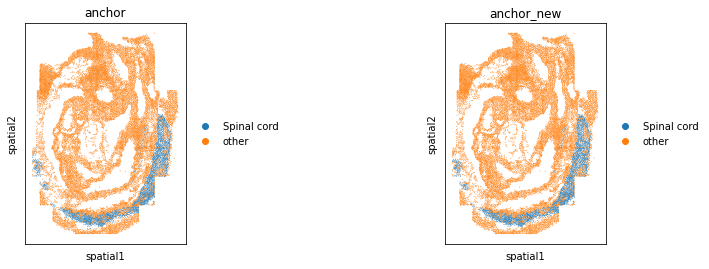

In [142]:
sc.pl.spatial(adata, color=["anchor", "anchor_new"], spot_size=0.03, save="_comparison")

In [2]:
adata = sc.read_h5ad('/home/laurens/Schreibtisch/Bachelorarbeit/LiverAgeing_pp_lowres.h5ad')

read: https://mc-stan.org/docs/2_29/stan-users-guide/reparameterization.html

In [38]:
import re
s = "m * x + 2"
re.sub("([2-9])", r"*\1*", s)

'm * x + *2*'

In [46]:
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors', 'design_matrix'
    obsm: 'X_umap', 'spatial', 'design_matrix_raw_dist', 'design_matrix'

In [49]:
import numpy as np
import scanpy as sc
from anndata import AnnData
import matplotlib.pyplot as plt
import re
from typing import Union

import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines


def build_model(adata: AnnData, design_matrix_key: str = None, spline_var: str = None, explanatory_var: Union[str, list] = None, genes = ""):
    """Build spline model with design matrix and variables."""
    df = adata.obsm["design_matrix"]

    x_spline = df[[spline_var]]

    bs = BSplines(x_spline, df=18, degree=3)
    
    results = []

    df = df.join(adata.to_df())
    
    if genes == "all":
        for gene in adata.var_names:

            formula = "Q('" + gene + "')" + " ~ " + explanatory_var


            gam_bs = GLMGam.from_formula(formula, data=df, smoother=bs)

            res_bs = gam_bs.fit()
        
            results.append(res_bs.summary())
    else:
        formula = "Q('" + genes + "')" + " ~ " + explanatory_var
        gam_bs = GLMGam.from_formula(formula, data=df, smoother=bs)

        res_bs = gam_bs.fit()
        adata.uns[design_matrix_key + "_model_summary"] = res_bs.summary()

    #adata.uns[design_matrix_key + "_model_plot"] = res_bs

In [50]:
build_model(adata, "design_matrix", "Spinal cord", "celltype_mapped_refined", "Acvr1")

In [51]:
adata.uns["design_matrix_model_summary"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Q('Acvr1')   No. Observations:                19416
Model:                         GLMGam   Df Residuals:                    19378
Model Family:                Gaussian   Df Model:                        37.00
Link Function:               identity   Scale:                         0.44877
Method:                         PIRLS   Log-Likelihood:                -19753.
Date:                Mon, 29 Aug 2022   Deviance:                       8696.2
Time:                        13:01:05   Pearson chi2:                 8.70e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02929
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.2635      0.073      3.628      0.000       0.121       0.406
celltype_mapped_refined[T.Anterior somitic tissues]           0.1672      0.100      1.670      0.095      -0.029       0.363
celltype_mapped_refined[T.Cardiomyocytes]                    -0.1313      0.081     -1.621      0.105      -0.290       0.027
celltype_mapped_refined[T.Cranial mesoderm]                   0.0896      0.082      1.092      0.275      -0.071       0.250
celltype_mapped_refined[T.Definitive endoderm]               -0.0229      0.091     -0.252      0.801      -0.200       0.155
celltype_mapped_refined[T.Dermomyotome]                       0.3669      0.083      4.429      0.000       0.205       0.529
celltype_mapped_refined[T.Endothelium]                        0.2297      0.080      2.883      0.004       0.074       0.386
celltype_mapped_refined[T.Erythroid]                         -0.0776      0.086     -0.902      0.367      -0.246       0.091
celltype_mapped_refined[T.Forebrain/Midbrain/Hindbrain]       0.0397      0.077      0.513      0.608      -0.112       0.191
celltype_mapped_refined[T.Gut tube]                           0.0680      0.078      0.867      0.386      -0.086       0.222
celltype_mapped_refined[T.Haematoendothelial progenitors]     0.1917      0.081      2.363      0.018       0.033       0.351
celltype_mapped_refined[T.Intermediate mesoderm]              0.1355      0.081      1.666      0.096      -0.024       0.295
celltype_mapped_refined[T.Lateral plate mesoderm]             0.2019      0.079      2.559      0.010       0.047       0.357
celltype_mapped_refined[T.Low quality]                       -0.0910      0.079     -1.157      0.247      -0.245       0.063
celltype_mapped_refined[T.Mixed mesenchymal mesoderm]        -0.0224      0.082     -0.273      0.785      -0.183       0.138
celltype_mapped_refined[T.Neural crest]                       0.0850      0.080      1.063      0.288      -0.072       0.242
celltype_mapped_refined[T.NMP]                                0.3194      0.103      3.116      0.002       0.119       0.520
celltype_mapped_refined[T.Presomitic mesoderm]                0.1489      0.083      1.796      0.073      -0.014       0.311
celltype_mapped_refined[T.Sclerotome]                        -0.0209      0.109     -0.192      0.847      -0.234       0.192
celltype_mapped_refined[T.Spinal cord]                       -0.0033      0.096     -0.034      0.973      -0.192       0.185
celltype_mapped_refined[T.Splanchnic mesoderm]                0.0961      0.079      1.213      0.225      -0.059       0.251
celltype_mapped_refined[T.Surface ectoderm]                

In [ ]:
from anndata import AnnData

from pathlib import Path

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

from patsy import dmatrix

def build_model(adata: AnnData, design_matrix_key: str, response_v: str, rnd_seed: int = 1):
    if __name__ == '__main__':
        RANDOM_SEED = rnd_seed
    
        num_knots = 15
    
        for v in adata.var_names:
            # get design matrix from anndata object
            df = adata.obsm[design_matrix_key].copy()
        
            #add v column to design matrix
            df[v] = sc.get.obs_df(adata, v).to_numpy()
        
            #subset df by rows containing non-zero values of given v
            #df = _subset_df(adata, df, v)
        
            df = df.rename(columns={response_v: response_v.replace(" ", "_")})
        
            df = df.sort_values(by=[response_v])
        
            knot_list = np.quantile(df[[response_v]], np.linspace(0, 1, num_knots))
        
            B = dmatrix(
                f"bs({response_v}, knots=knots, degree=3, include_intercept=True) - 1",
                {response_v: df[[response_v]].values, "knots": knot_list[1:-1]},)
        
            COORDS = {"splines": np.arange(B.shape[1])}
            with pm.Model(coords=COORDS) as spline_model:
                a = pm.Normal("a", 100, 5)
                w = pm.Normal("w", mu=0, sigma=3, size=B.shape[1], dims="splines")
                mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))
                sigma = pm.Exponential("sigma", 1)
                D = pm.Normal("D", mu=mu, sigma=sigma, observed=df[v].values, dims="obs")
    
            with spline_model:
                idata = pm.sample_prior_predictive()
                idata.extend(pm.sample(draws=1000, tune=1000, random_seed=RANDOM_SEED, chains=1, cores=4))
                pm.sample_posterior_predictive(idata, extend_inferencedata=True)

In [ ]:
build_model(adata, "design_matrix", "NMP")

In [ ]:
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

In [ ]:
df = adata.obsm["8_Cd36_euclidean"]
df

In [ ]:
x_spline = df[['8']]

In [ ]:
alpha = np.array([2])
alpha

In [ ]:
bs = BSplines(x_spline, df=[6,6], degree=[3,3])

In [ ]:
gam_bs = GLMGam.from_formula('Cd36 ~ mouse_id + slide + leiden + Cd36', data=df, smoother=bs)

In [ ]:
res_bs = gam_bs.fit()

In [ ]:
testing = np.identity(len(res_bs.params))
testing = testing[1:,:]
testing

In [ ]:
print(res_bs.summary())

In [ ]:
res_bs.plot_partial(0, cpr=False, plot_se=True, include_constant=True)

In [ ]:
res_bs.plot_partial(0, cpr=True, plot_se=True, include_constant=True)

In [ ]:
res_bs.f_test(testing)

In [ ]:
#from stackoverflow
xy1 = np.array(
    [[243,  3173],
     [525,  2997]])

xy2 = np.array(
    [[682, 2644],
     [277, 2651],
     [396, 2640]])

# This solution is optimal when xy2 is very large
tree = spatial.cKDTree(xy2)
mindist, minid = tree.query(xy1)
print(mindist)

# This solution by @denis is OK for small xy2
mindist = np.min(spatial.distance.cdist(xy1, xy2), axis=1)
print(mindist)

In [ ]:
num_knots = 15
knot_list = np.quantile(df.euclidean_dist, np.linspace(0, 1, num_knots))
knot_list

In [ ]:
df.plot.scatter("euclidean_dist","score", color="cornflowerblue", s=10, title="a", ylabel="score")
for knot in knot_list:
    plt.gca().axvline(knot, color="grey", alpha=0.4)

In [ ]:
from patsy import dmatrix
B = dmatrix(
    "bs(euclidean_dist, knots=knots, degree=3, include_intercept=True) - 1",
    {"euclidean_dist": df.euclidean_dist.values, "knots": knot_list[1:-1]},
)
B

In [ ]:
spline_df = (
    pd.DataFrame(B)
    .assign(euclidean_dist=df.euclidean_dist.values)
    .melt("euclidean_dist", var_name="spline_i", value_name="value")
)

color = plt.cm.magma(np.linspace(0, 0.80, len(spline_df.spline_i.unique())))

fig = plt.figure()
for i, c in enumerate(color):
    subset = spline_df.query(f"spline_i == {i}")
    subset.plot("euclidean_dist", "value", c=c, ax=plt.gca(), label=i)
plt.legend(title="Spline Index", loc="upper center", fontsize=8, ncol=6);

In [ ]:
COORDS = {"splines": np.arange(B.shape[1])}
RANDOM_SEED = 8927
with pm.Model(coords=COORDS, rng_seeder=RANDOM_SEED) as spline_model:
    a = pm.Normal("a", 100, 5)
    w = pm.Normal("w", mu=0, sigma=3, size=B.shape[1], dims="splines")
    mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu=mu, sigma=sigma, observed=df.score, dims="obs")

In [ ]:
pm.model_to_graphviz(spline_model)